In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


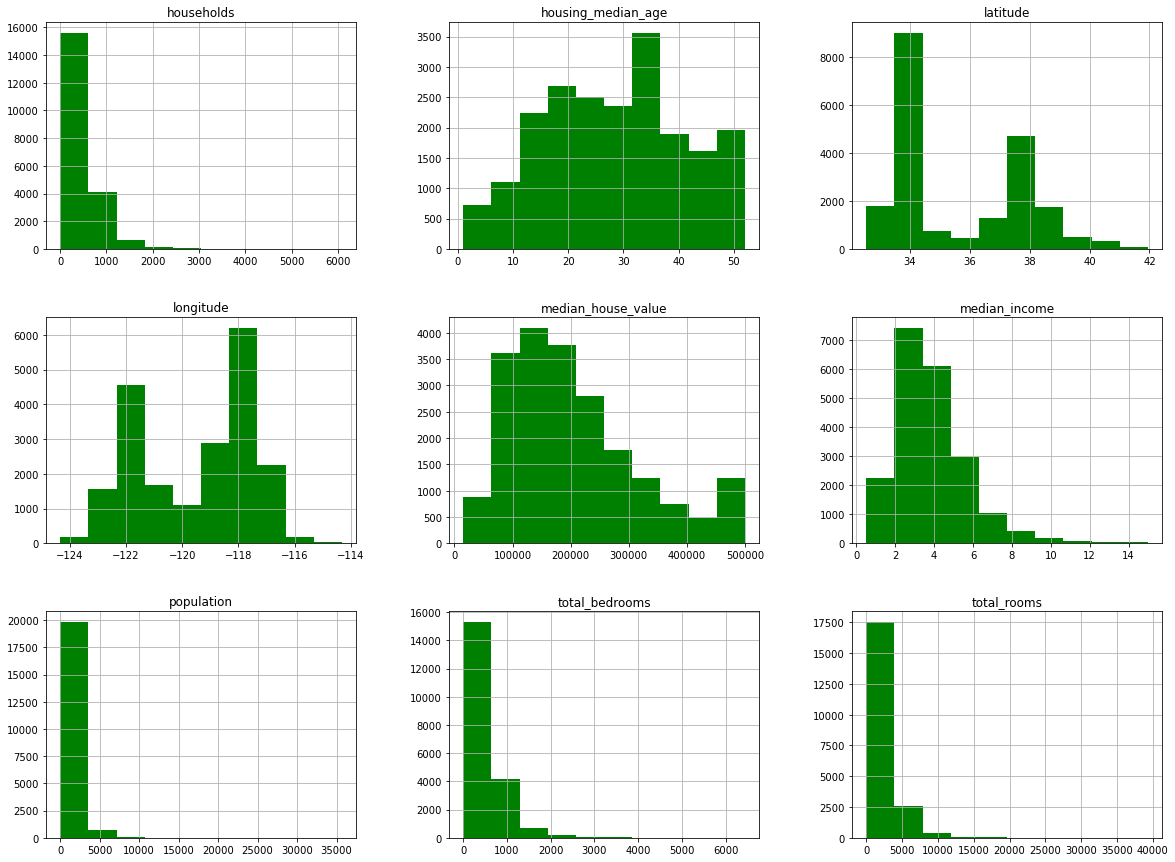

In [2]:
data = pd.read_csv('housing.csv')
print(data.head())
data.hist(figsize=(20,15), color = 'green')
plt.show()

In [3]:
data = data.dropna(axis=0)
# print(data.isnull().sum())  
x_data = data.drop(data.columns[[8,9]],axis = 1)
y_data = data['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(16346, 8)
(16346,)


In [4]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg.fit(X_train,y_train)
print(
    poly_reg.score(X_train,y_train),
    poly_reg.score(X_test,y_test)
)

0.6991893657940383 0.6977244934098342


In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print(
    lin_reg.score(X_train,y_train),
    lin_reg.score(X_test,y_test)
)

0.6342968604357642 0.6471052010910112


In [6]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred = GNB.predict(X_train)
print(
    GNB.score(X_train,y_train),
    GNB.score(X_test,y_test)
)

0.09965740854031567 0.007095669195008564


In [7]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [8]:
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns, index= X_train.index)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
18171,0.233068,0.512221,0.294118,0.027954,0.054780,0.013902,0.053116,0.255596
20341,0.529880,0.178533,0.450980,0.086865,0.101645,0.062137,0.105904,0.295389
9032,0.570717,0.161530,0.470588,0.090044,0.090472,0.042798,0.098668,0.475869
19716,0.269920,0.709883,0.705882,0.030091,0.038330,0.017489,0.035849,0.231804
748,0.225100,0.544102,0.745098,0.029353,0.040037,0.020236,0.044894,0.118778
